<a href="https://colab.research.google.com/github/Mochismo/LearnPython/blob/main/34_Faster_R_CNN_%26_YOLO_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Faster R-CNN

[[1] Ren, S., He, K., Girshick, R., Sun, J .: Faster r-cnn: Towards real-time object detection with region proposal networks. In: Advances in neural information processing systems. (2015 ) 91–99](https://arxiv.org/pdf/1506.01497.pdf)

[Keras Implimentation code from GitHub](https://github.com/duckrabbits/ObjectDetection/tree/master)

In [1]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


We will run all activities on cloud because of huge data

In [2]:
mkdir .kaggle

In [3]:
import json

token = {"username":"mosesowiti","key":"3901ca426ffcb77ded093069c2977257"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
  json.dump(token, file)

Inorder to work we store it under root/kaggle path

In [5]:
mkdir /root/.kaggle

In [6]:
!cp -R /content/.kaggle/kaggle.json /root/.kaggle/

Let's download the data

In [7]:
import os
os.chdir('/content/drive/MyDrive/')
print(os.getcwd())

/content/drive/MyDrive


In [8]:
# simpsons dataset
!kaggle datasets download -d alexattia/the-simpsons-characters-dataset --force

401 - Unauthorized


We Unzip the dataset

In [9]:
!unzip /content/drive/MyDrive/the-simpsons-characters-dataset.zip  -d Simpsons


Streaming output truncated to the last 5000 lines.
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1271.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1272.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1273.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1274.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1275.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1276.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1277.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1278.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1279.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1280.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1281.jpg  
  inflating: Simpsons/simpsons_datas

We will clone the implimentation from GitHub and store it on our Google Drive

In [10]:
!git clone https://github.com/duckrabbits/ObjectDetection.git

fatal: destination path 'ObjectDetection' already exists and is not an empty directory.


We need to move the dataset into the object detection folder

In [11]:
mv Simpsons/simpsons_dataset ObjectDetection/

After cloning the repository we can navigate inside it, in order to run the files in it

In [12]:
cd ObjectDetection/

/content/drive/My Drive/ObjectDetection


Because we are running published codes, there is a chance that the codes are written based on a previous version of Keras and TensorFlow, so lets specify which versions to use. 

In [13]:
!pip install keras==2.2.0

     |████████████████████████████████| 300 kB 5.4 MB/s 
     |████████████████████████████████| 43 kB 1.8 MB/s 
  Attempting uninstall: keras-preprocessing
    Found existing installation: Keras-Preprocessing 1.1.2
    Uninstalling Keras-Preprocessing-1.1.2:
      Successfully uninstalled Keras-Preprocessing-1.1.2
  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.7.0 requires keras<2.8,>=2.7.0rc0, but you have keras 2.2.0 which is incompatible.
tensorflow 2.7.0 requires keras-preprocessing>=1.1.1, but you have keras-preprocessing 1.0.1 which is incompatible.


In [14]:
!pip install tensorflow==1.15

     |████████████████████████████████| 412.3 MB 18 kB/s 
     |████████████████████████████████| 503 kB 57.1 MB/s 
     |████████████████████████████████| 50 kB 6.6 MB/s 
     |████████████████████████████████| 3.8 MB 30.8 MB/s 
     |████████████████████████████████| 42 kB 1.3 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=ebb98f3b10820218f879cde7ab065db34bd86067c9139c1beb5e9cb27e28ebe9
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: keras-preprocessing
    Found exis

In [15]:
!pip install Keras-Applications==1.0.7

     |████████████████████████████████| 51 kB 508 kB/s 
  Attempting uninstall: Keras-Applications
    Found existing installation: Keras-Applications 1.0.8
    Uninstalling Keras-Applications-1.0.8:
      Successfully uninstalled Keras-Applications-1.0.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 1.15.0 requires keras-applications>=1.0.8, but you have keras-applications 1.0.7 which is incompatible.
keras 2.2.0 requires keras-applications==1.0.2, but you have keras-applications 1.0.7 which is incompatible.
keras 2.2.0 requires keras-preprocessing==1.0.1, but you have keras-preprocessing 1.1.2 which is incompatible.
kapre 0.3.6 requires tensorflow>=2.0.0, but you have tensorflow 1.15.0 which is incompatible.


# Problem 1
Learning and Estimation

In [16]:
!python train.py -p annotation.txt

Using TensorFlow backend.
Parsing annotation files
Training images per class (19 classes) :
{'abraham_grampa_simpson': 687,
 'apu_nahasapeemapetilon': 206,
 'bart_simpson': 650,
 'bg': 0,
 'charles_montgomery_burns': 650,
 'chief_wiggum': 209,
 'comic_book_guy': 208,
 'edna_krabappel': 212,
 'homer_simpson': 718,
 'kent_brockman': 213,
 'krusty_the_clown': 429,
 'lisa_simpson': 756,
 'marge_simpson': 629,
 'milhouse_van_houten': 210,
 'moe_szyslak': 403,
 'ned_flanders': 675,
 'nelson_muntz': 219,
 'principal_skinner': 614,
 'sideshow_bob': 201}
-------------------------------
path to config file : ./save/train_20220109-081456_config.pickle
-------------------------------









Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLaye

In [17]:
import tensorflow.compat.v1 as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

In [18]:
!pip install 'h5py==2.10.0' --force-reinstall

     |████████████████████████████████| 2.9 MB 5.2 MB/s 
     |████████████████████████████████| 15.7 MB 27.9 MB/s 
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.5 which is incompatible.
tensorflow 1.15.0 requires keras-applications>=1.0.8, but you have keras-applications 1.0.7 which is incompatible.
tensorflow-probability 0.15.0 requires gast>=0.3.2, but

In [19]:
ls

annotation.txt           model/   output/     README.md  simpsons_dataset/
kaggle_simpson_testset/  out.csv  predict.py  save/      train.py


In [20]:
!python predict.py -i /content/drive/MyDrive/ObjectDetection/kaggle_simpson_testset/kaggle_simpson_testset -c ./save/train_20220107-120240_config.pickle

Using TensorFlow backend.










2022-01-09 08:28:09.669598: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected




abraham_grampa_simpson_0.jpg
[]
Elapsed time = 10.403844356536865[s]
abraham_grampa_simpson_1.jpg
[]
Elapsed time = 9.399335384368896[s]
abraham_grampa_simpson_10.jpg
[]
Elapsed time = 9.420384407043457[s]
abraham_grampa_simpson_11.jpg
[]
Elapsed time = 9.495965719223022[s]
abraham_grampa_simpson_12.jpg
Traceback (most recent call last):
  File "predict.py", line 246, in <module>
    main()
  File "predict.py", line 239, in main
    img = detect_predict(img, C, model_rpn, model_classifier, model_classifier_only, class_mapping, class_to_color, True)
  File "predict.py", line 121, in detect_predict
    [P_cls, P_regr] = model_classifier_only.predict([F, ROIs])
  File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 1172, in predict
    steps=steps)
  File "/usr/local

# Problem 2: Code Reading
1. RPN which is defined in resnet.py rpn(base_layers, num_anchors)
2. RoI pooling which is defined in RoipoolingConv.py, class RoiPoolingConv(Layer)
3. Losses which are defined in losses.py,
   * def rpn_loss_regr(num_anchors)
   * def rpn_loss_cls(num_anchors)
   * def rpn_loss_regr(num_classes)
   * def rpn_loss_cls(y_true, y_pred)



# Problem 3

In [22]:
cd ..

/content/drive/My Drive


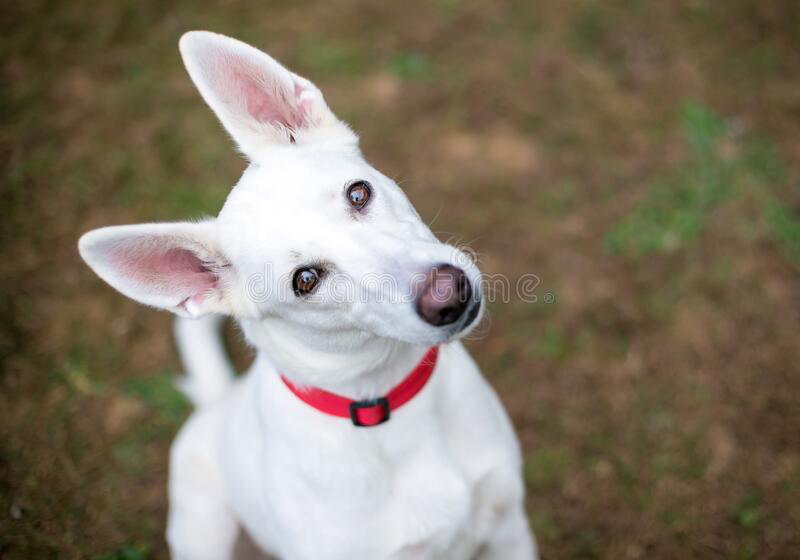

In [29]:
#The input image
from PIL import Image
img = Image.open('/content/dogimage.jpg', 'r')
#img = Image.open('/content/img-hero_dog.png', 'r')
img

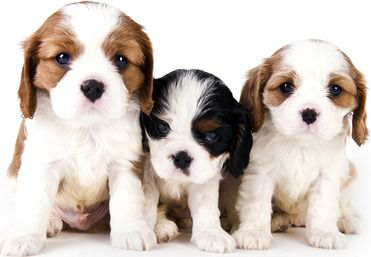

In [32]:
img = Image.open('/content/2dogimage.jpg', 'r')
img

In [23]:
!git clone https://github.com/qqwweee/keras-yolo3.git

Cloning into 'keras-yolo3'...
remote: Enumerating objects: 144, done.
remote: Total 144 (delta 0), reused 0 (delta 0), pack-reused 144
Receiving objects: 100% (144/144), 151.08 KiB | 2.13 MiB/s, done.
Resolving deltas: 100% (65/65), done.


In [24]:
os.chdir('/content/drive/MyDrive/keras-yolo3')
print(os.getcwd())

/content/drive/MyDrive/keras-yolo3


In [25]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2022-01-09 08:38:35--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  42.8MB/s    in 5.8s    

2022-01-09 08:38:41 (40.9 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [26]:
! python convert.py yolov3.cfg yolov3.weights model_data/yolo.h5

Using TensorFlow backend.
Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.


Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)




2022-01-09 08:42:24.217015: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected





Parsing section convolutional_1
conv2d bn leaky (3, 3, 32, 64)
Parsing section convolutional_2
conv2d bn leaky (1, 1, 64, 32)
Parsing section convolutional_3
conv2d bn leaky (3, 3, 32, 64)
Parsing section shortcut_0
Parsing section convolutional_4
conv2d bn leaky (3, 3, 64, 128)
Parsing section convolutional_5
conv2d bn leaky (1, 1, 128, 64)
Parsing section convolutional_6
conv2d bn leaky (3, 3, 64, 128)
Parsing section shortcut_1
Parsing section convolutional_7
conv2d bn leaky (1, 1, 128, 64)
Parsing section convolutional_8
conv2d bn leaky (3, 3, 64, 128)
Parsing section shortcut_2
Parsing section convolutional_

In [48]:
!python yolo_video.py --image

Using TensorFlow backend.
Image detection mode
 Ignoring remaining command line arguments: ./path2your_video,



2022-01-09 10:57:42.891498: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected









model_data/yolo.h5 model, anchors, and classes loaded.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Input image filename:/content/dogimage.jpg
(416, 416, 3)
Found 1 boxes for img
dog 1.00 (69, 10) (575, 553)
4.5782588649999525
Input image filename:/content/2dogimage.jpg
(416, 416, 3)
Found 3 boxes for img
dog 0.99 (132, 63) (253, 250)
dog 0.99 (5, 3) (159, 252)
dog 0.99 (235, 48) (365, 250)
1.5946227019994694
Input image filename:Traceback (most recent call last):



# Problem 4: Creating a file for Learning

In [51]:
import pandas as pd
annotation_df = pd.read_csv('../ObjectDetection/annotation.txt',header=None)
n_sample, n_col = annotation_df.shape
print(n_sample, n_col)
annotation_df.head()

7889 6


,0,1,2,3,4,5
0,simpsons_dataset/abraham_grampa_simpson/pic_00...,57,72,52,72,abraham_grampa_simpson
1,simpsons_dataset/abraham_grampa_simpson/pic_00...,80,31,337,354,abraham_grampa_simpson
2,simpsons_dataset/abraham_grampa_simpson/pic_00...,128,48,285,407,abraham_grampa_simpson
3,simpsons_dataset/abraham_grampa_simpson/pic_00...,72,126,158,275,abraham_grampa_simpson
4,simpsons_dataset/abraham_grampa_simpson/pic_00...,123,61,294,416,abraham_grampa_simpson


In [52]:
#Preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
annotation_df.iloc[:,5] = le.fit_transform(annotation_df.iloc[:,5])
annotation_df.tail()

,0,1,2,3,4,5
7884,simpsons_dataset/moe_szyslak/pic_0160.jpg,21,9,69,75,13
7885,simpsons_dataset/moe_szyslak/pic_0033.jpg,89,8,126,74,13
7886,simpsons_dataset/moe_szyslak/pic_0337.jpg,66,75,196,245,13
7887,simpsons_dataset/moe_szyslak/pic_1067.jpg,159,44,287,247,13
7888,simpsons_dataset/moe_szyslak/pic_0928.jpg,185,64,396,329,13


In [53]:
path = '../ObjectDetection/annotation.txt'
out_path = 'train.txt'

with open(path) as f:
  lines = f.readline()
  for i in range(n_sample):
    split_line = lines.split(',')
    image_path = split_line[0]
    split_line[0] = './' + image_path
    split_line[-1] = str(annotation_df.iloc[i,5]) + '\n'

    with open(out_path, mode='a') as out_f:
      join_line = ','.join(split_line)
      join_line = join_line.replace('.jpg','.jpg')
      out_f.write(join_line)

Problem 5: Confirmation that Learning can be done

In [54]:
cp -R ../ObjectDetection/simpsons_dataset/ ./

In [55]:
!python convert.py -w yolov3.cfg yolov3.weights model_data/yolo_weights.h5

Using TensorFlow backend.
Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.


Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)




2022-01-09 11:19:16.616324: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected





Parsing section convolutional_1
conv2d bn leaky (3, 3, 32, 64)
Parsing section convolutional_2
conv2d bn leaky (1, 1, 64, 32)
Parsing section convolutional_3
conv2d bn leaky (3, 3, 32, 64)
Parsing section shortcut_0
Parsing section convolutional_4
conv2d bn leaky (3, 3, 64, 128)
Parsing section convolutional_5
conv2d bn leaky (1, 1, 128, 64)
Parsing section convolutional_6
conv2d bn leaky (3, 3, 64, 128)
Parsing section shortcut_1
Parsing section convolutional_7
conv2d bn leaky (1, 1, 128, 64)
Parsing section convolutional_8
conv2d bn leaky (3, 3, 64, 128)
Parsing section shortcut_2
Parsing section convolutional_

In [56]:
!python train.py

Using TensorFlow backend.








2022-01-09 11:21:45.359360: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected





Create YOLOv3 model with 9 anchors and 20 classes.
/usr/local/lib/python3.7/dist-packages/keras/engine/saving.py:1009: UserWarning: Skipping loading of weights for layer conv2d_59 due to mismatch in shape ((1, 1, 1024, 75) vs (255, 1024, 1, 1)).
  weight_values[i].shape))
/usr/local/lib/python3.7/dist-packages/keras/engine/saving.py:1009: UserWarning: Skipping loading of weights for layer conv2d_59 due to mismatch in shape ((75,) vs (255,)).
  weight_values[i].shape))
/usr/local/lib/python3.7/dist-packages/keras/engine/saving.py:1009: UserWarning: Skipping loading of weights for layer conv2d_67 due to mismatch in shape ((1, 1, 512, 75) vs (255, 512, 1, 1)).
  weight_values[i].shape))
/usr/local/lib/python3.7/dist-packages/keras/engine/saving.py:1009: UserWarning: Skipping loading of weigh

In [ ]:
/content/drive/MyDrive/keras-yolo3/simpsons_dataset/abraham_grampa_simpson/pic_0000.jpg

## The training is possible but it takes too long and it can be seen that the losses are decreasing, then it means that it's learning.